In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import unicodedata
from collections import Counter

In [2]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"

In [3]:
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [4]:
train_desc = pd.read_csv(f"{ruta_data}/descripciones_train_limpias.csv")

In [5]:
train_desc = train_desc.fillna("")

In [6]:
stop_words_sp = set(stopwords.words('spanish'))

In [7]:
aux = set()
for word in stop_words_sp:
    aux.add(strip_accents(word))
    
stop_words_sp = stop_words_sp.union(aux)

In [48]:
descripciones = " ".join(" ".join(set(descr.split())) for descr in train_desc["descripcion"])

In [9]:
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white").generate(descripciones)

In [49]:
frecuencias = Counter(word for word in descripciones.split() if (word not in stop_words_sp and word not in "1234567890,."))

In [50]:
for k in frecuencias:
    frecuencias[k] /= train_desc.shape[0]

In [31]:
frecuencias.most_common(50)

[('casa', 0.48473333333333335),
 ('cocina', 0.4693),
 ('bano', 0.3786375),
 ('recamaras', 0.357625),
 ('sala', 0.2917125),
 ('cuenta', 0.2878541666666667),
 ('comedor,', 0.27526666666666666),
 ('area', 0.2692291666666667),
 ('recamaras,', 0.26747916666666666),
 ('cuarto', 0.24569583333333334),
 ('excelente', 0.2398125),
 ('dos', 0.22524166666666667),
 ('principal', 0.22147083333333334),
 ('sala,', 0.1938125),
 ('planta', 0.19173333333333334),
 ('patio', 0.18785416666666666),
 ('servicio', 0.1813375),
 ('estacionamiento', 0.17117083333333333),
 ('cochera', 0.1707875),
 ('bano,', 0.1706875),
 ('banos', 0.16885416666666667),
 ('jardin', 0.16033333333333333),
 ('departamento', 0.15412916666666668),
 ('comedor', 0.15344166666666667),
 ('recamara', 0.15219583333333334),
 ('cerca', 0.134),
 ('banos,', 0.132675),
 ('cocina,', 0.132675),
 ('terreno', 0.13250833333333334),
 ('integral', 0.1303625),
 ('m2', 0.12327083333333333),
 ('venta', 0.12024166666666666),
 ('medio', 0.11549583333333334),
 (

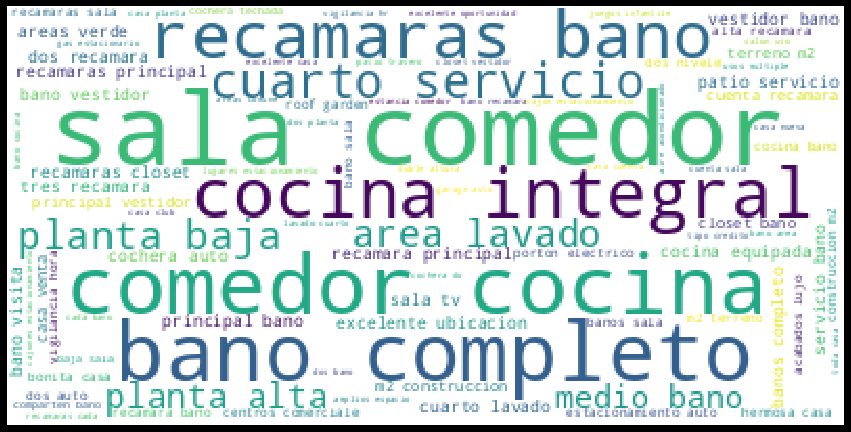

In [32]:
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

---

In [41]:
train_lim = pd.read_csv(f"{ruta_data}/train_limpio.csv", usecols=["precio"])

In [42]:
train_desc["precio"] = train_lim["precio"]

In [75]:
train_caro = train_desc[train_desc["precio"] >= 5999999]

In [76]:
train_caro.shape

(19090, 2)

In [77]:
descripciones = " ".join(" ".join(set(descr.split())) for descr in train_caro["descripcion"])

In [78]:
frecuencias_caras = Counter(word for word in descripciones.split() if (word not in stop_words_sp and word not in "1234567890,."))

In [79]:
for k in frecuencias_caras:
    frecuencias_caras[k] /= train_caro.shape[0]

In [85]:
for word, porc in frecuencias_caras.most_common(300):
    if porc - frecuencias[word] >= 0.06:
        print(word)

cuarto
sala
servicio
jardin
vestidor
salon
terraza
vista
cada
vestidor,
family


In [48]:
wordcloud = WordCloud(width=600, height=300, stopwords=stop_words_sp, background_color="white").generate(descripciones)

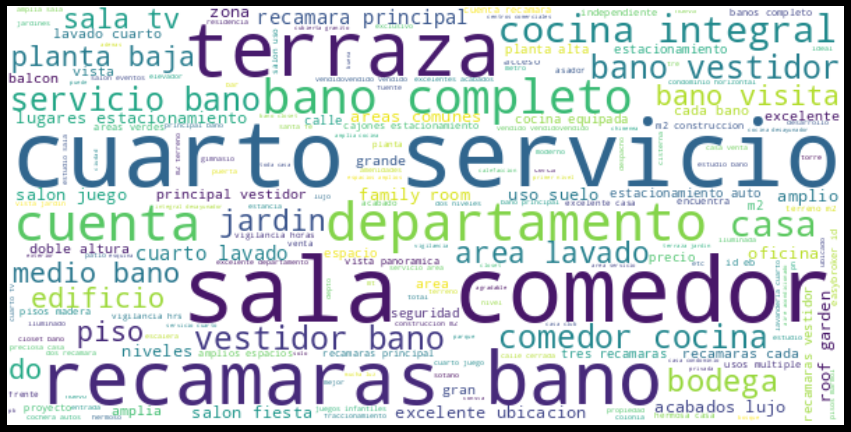

In [49]:
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()